In [103]:
import pandas as pd
from colors import colors
from matplotlib import pyplot as plt
import math
import numpy as np
from sklearn.metrics import log_loss

In [104]:
# Calculate probability matrix
def hypothesis(theta, X):
    return 1 / (1 + np.exp(-(np.dot(theta, X.T))))

In [105]:
# Cost function
def cost(X, y, theta):
    y1 = hypothesis(theta, X)
    return -(1/len(X)) * np.sum(y * np.log(y1) + (1 - y) * np.log(1 - y1))

In [106]:
# Drop all non-numeric columns but "Hogwarts House"
def drop_columns(df):
    df.drop(columns=['Index'], inplace=True)
    for column in df:
        if df[column].dtype.kind in 'biufc':
            continue
        if column == 'Hogwarts House':
            continue
        else:
            df.drop(columns=[column], inplace=True)

In [107]:
log_loss_results = []
# Perform gradient descent to update every value in theta (13x4 matrix)
def gradient_descent(X, y, theta, L, epochs):
    n = len(X)
    theta = pd.DataFrame(theta)
    for i in range(0, epochs):
        output_arr = []
        # j represents each Hogwarts course
        for j in range(0, theta.shape[1]):
            # [:,j] takes the j'th column of the theta 2d array
            h = hypothesis(theta.iloc[:,j], X)
            # k stands for each Hogwarts house
            for k in range(0, theta.shape[0]):
                theta.iloc[k, j] -= (L/n) * np.sum((h - y.iloc[:, j]) * X.iloc[:, k])
            output_arr.append(h)
        output_arr = pd.DataFrame(output_arr)
        log_loss_results.append(log_loss(y, output_arr.T))
    
    return theta

In [108]:
# Read training dataset and preprocess it
try:
    df = pd.read_csv("datasets/dataset_train.csv")
except:
    print(f"{colors().RED}Error: could not read file{colors().END}")
    exit()
drop_columns(df)

In [109]:
# Normalize data
for column in df:
    if df[column].dtype.kind not in 'biufc':
        continue
    max_norm = df[column].max()
    min_norm = df[column].min()

    # Put column mean for NaN values
    for i in range(len(df)):
        if column != "Hogwarts House":
            if math.isnan(df.iloc[i, df.columns.get_loc(column)]) == True:
                df.iloc[i, df.columns.get_loc(column)] = float(df[column].mean())
    # Perform min-max normalization
    for i in range(len(df)):
        df.iloc[i, df.columns.get_loc(column)] = (df.iloc[i, df.columns.get_loc(column)] - min_norm) / (max_norm - min_norm)

In [110]:
# Split into input (df_no_house, later -> X) and output (y) variables
df_no_house = df.drop(columns=["Hogwarts House"])
y = df["Hogwarts House"]

In [111]:
df_no_house

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0.639887,0.241486,0.731351,0.758514,0.716936,0.623499,0.538679,0.679081,0.692354,0.465490,0.632571,0.793213,0.335649
1,0.708357,0.209123,0.196645,0.790877,0.166054,0.274983,0.181768,0.624914,0.791954,0.655153,0.534573,0.248862,0.147696
2,0.371712,0.302914,0.822541,0.697086,0.792526,0.803801,0.690568,0.598330,0.943484,0.736308,0.439286,0.946253,0.460090
3,0.441033,0.839396,0.173377,0.160604,0.679834,0.252191,0.520257,0.195162,0.071565,0.302694,0.517978,0.117970,0.829700
4,0.653604,0.707791,0.112971,0.492914,0.584413,0.294754,0.683503,0.260962,0.160179,0.494046,0.478728,0.130868,0.737070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.567396,0.666189,0.262629,0.333811,0.769177,0.270442,0.724445,0.174819,0.299445,0.443483,0.418148,0.299121,0.797542
1596,0.677868,0.672871,0.746591,0.327129,0.558878,0.203419,0.350918,0.534834,0.777411,0.577087,0.467757,0.410483,0.491315
1597,0.682577,0.761874,0.323727,0.238126,0.788528,0.321883,0.761260,0.138550,0.245615,0.351388,0.531417,0.264231,0.824988
1598,0.828008,0.716314,0.627083,0.283686,0.824404,0.116920,0.215752,0.610742,0.942760,0.471727,0.436688,0.417122,0.227255


In [112]:
# House probability matrix y1
y1 = np.zeros([df_no_house.shape[0], len(y.unique())])
y1 = pd.DataFrame(y1)
y1

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
1595,0.0,0.0,0.0,0.0
1596,0.0,0.0,0.0,0.0
1597,0.0,0.0,0.0,0.0
1598,0.0,0.0,0.0,0.0


In [113]:
# Fill probability matrix with '1' for corresponding house
for i in range(0, len(y.unique())):
    for j in range(0, len(y1)):
        if y[j] == y.unique()[i]:
            y1.iloc[j, i] = 1
        else:
            y1.iloc[j, i] = 0
y1.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [114]:
y1.shape

(1600, 4)

In [115]:
# Add a bias column
X = pd.concat([pd.Series(1, index=df_no_house.index, name='bias'), df_no_house], axis=1)
X

,bias,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,1,0.639887,0.241486,0.731351,0.758514,0.716936,0.623499,0.538679,0.679081,0.692354,0.465490,0.632571,0.793213,0.335649
1,1,0.708357,0.209123,0.196645,0.790877,0.166054,0.274983,0.181768,0.624914,0.791954,0.655153,0.534573,0.248862,0.147696
2,1,0.371712,0.302914,0.822541,0.697086,0.792526,0.803801,0.690568,0.598330,0.943484,0.736308,0.439286,0.946253,0.460090
3,1,0.441033,0.839396,0.173377,0.160604,0.679834,0.252191,0.520257,0.195162,0.071565,0.302694,0.517978,0.117970,0.829700
4,1,0.653604,0.707791,0.112971,0.492914,0.584413,0.294754,0.683503,0.260962,0.160179,0.494046,0.478728,0.130868,0.737070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1,0.567396,0.666189,0.262629,0.333811,0.769177,0.270442,0.724445,0.174819,0.299445,0.443483,0.418148,0.299121,0.797542
1596,1,0.677868,0.672871,0.746591,0.327129,0.558878,0.203419,0.350918,0.534834,0.777411,0.577087,0.467757,0.410483,0.491315
1597,1,0.682577,0.761874,0.323727,0.238126,0.788528,0.321883,0.761260,0.138550,0.245615,0.351388,0.531417,0.264231,0.824988
1598,1,0.828008,0.716314,0.627083,0.283686,0.824404,0.116920,0.215752,0.610742,0.942760,0.471727,0.436688,0.417122,0.227255


In [116]:
# Create theta matrix
theta = np.zeros([df_no_house.shape[1]+1, y1.shape[1]])
theta = pd.DataFrame(theta)

type(theta.iloc[:,0])
theta = gradient_descent(X, y1, theta, 0.3, 4000) # CHANGE VALUES HERE
theta

,0,1,2,3
0,-4.052166,1.247184,0.181002,-1.622821
1,-1.445756,0.624154,-0.793978,-0.040510
2,-5.116964,-2.765518,1.220778,4.391777
3,2.334308,-3.515614,-3.496321,5.335661
4,1.266205,3.999883,-1.031140,-6.026491
5,1.274920,-5.685943,1.759040,1.924245
6,4.701000,-1.885550,0.025558,-3.514966
7,3.742709,-2.623456,3.708141,-5.840986
8,-1.049723,1.251352,-3.521261,2.628096
9,-1.284850,1.993799,-4.024401,2.694968


In [117]:
# Export thetas to file
np.savetxt('theta.txt', theta)

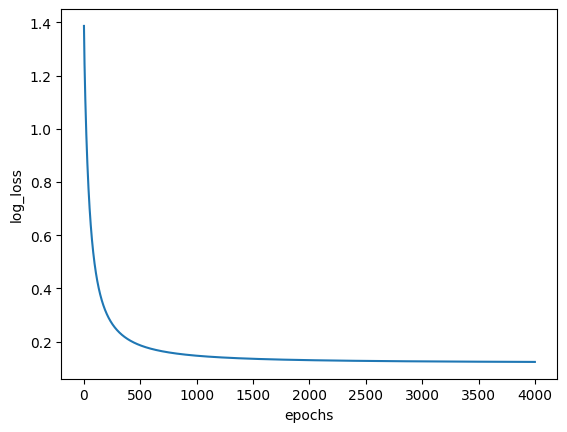

In [118]:
# Plot loss function
plt.plot(log_loss_results)
plt.xlabel('epochs')
plt.ylabel('log_loss')
plt.show()

In [119]:
# GET ACCURACY LEVEL FOR TESTING

In [120]:
# Calculate probability matrix
prob_matrix = []
for i in range(0, 4):
    theta1 = pd.DataFrame(theta)
    h = hypothesis(theta1.iloc[:,i], X)
    prob_matrix.append(h)
prob_matrix = pd.DataFrame(prob_matrix)

In [121]:
prob_matrix

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.936863,0.007474,0.987954,0.001311,0.003803,0.016964,0.000728,0.010908,0.006054,0.008778,...,0.988180,0.011211,0.039441,0.974133,0.006699,0.018015,0.005440,0.013616,0.002228,0.007777
1,0.012201,0.994030,0.002609,0.001044,0.021253,0.993763,0.001265,0.007063,0.000466,0.003571,...,0.009290,0.986973,0.000229,0.005329,0.002250,0.001297,0.018094,0.000304,0.014386,0.001309
2,0.003964,0.001647,0.003969,0.994333,0.981614,0.002171,0.997568,0.022597,0.996505,0.004091,...,0.003786,0.002677,0.988333,0.005872,0.028907,0.979845,0.012613,0.989769,0.002697,0.004627
3,0.020409,0.012547,0.011260,0.031258,0.000701,0.002957,0.011830,0.876405,0.007150,0.995701,...,0.007249,0.010375,0.006635,0.005124,0.936126,0.004442,0.900141,0.009367,0.995182,0.998171


In [122]:
# Refactor prediction matrix for accuracy testing
for col in range(0,1600):
    max_prob_index = 0
    i = 0
    for row in range(0,4):
        if prob_matrix[col][row] > prob_matrix[col][max_prob_index]:
            max_prob_index = row
    for row in range(0,4):
        if row == max_prob_index:
            prob_matrix[col][row] = 1
        else:
            prob_matrix[col][row] = 0

prob_matrix

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [123]:
# Get accuracy score through sklearn
from sklearn.metrics import accuracy_score
y_pred = prob_matrix.T
y_true = y1
score = accuracy_score(y_true, y_pred)

# 0.980625 for 6000 epochs, 0.06 learning rate
# 0.980625 for 6000 epochs, 0.08 learning rate
# 0.15, 6000 -> 0.98125
# 0.3, 6000 -> 0.98125
# 0.5, 4000 -> 0.381875
# 0.3, 4000 -> 0.381875
score

0.981875